# Basketball-Reference Scraper Overview
After scraping the data (see: [basketball-reference-scraper.ipynb](https://github.com/rahim-hashim/NBA-Prediction-Algorithms/blob/df_version/basketball-reference-scraper.ipynb)), you'll have 3 DataFrames saved as a [pickle file](https://docs.python.org/3/library/pickle.html) which you can upload:

1. **df_players_meta**
  * biodata (i.e. height, age, weight)
2. **df_players_data**
  * season data (per-game, total, per-possesion)
3. **df_players_gamelogs**
  * gamelogs for all players

***
## Import and Path Assignment


In [1]:
%reload_ext autoreload
import os
import sys
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict, defaultdict
pd.options.mode.chained_assignment = None  # default='warn'

ROOT = '/content/drive/MyDrive/Projects/nba-prediction-algorithm/NBA-Prediction-Algorithms/' #@param ['/content/drive/MyDrive/Projects/nba-prediction-algorithm/NBA-Prediction-Algorithms/']  

# add (non-Python) helper functions
def add_helpers():
  '''
  add_helper mounts google drive and adds
  helper functions to the sys.path
  '''

  # if running on juypter/google colab, mount to google drive
  if 'google.colab' in str(get_ipython()): 
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    os.chdir(ROOT)

  helper_dir_path = ROOT + 'helper/'
  print('\nHelpers:')
  pprint(sorted(os.listdir(helper_dir_path)))
  sys.path.append(helper_dir_path) # set to path of notebook

add_helpers()

Mounted at /content/drive

Helpers:
['Regions.py',
 'TeamNames.py',
 '__pycache__',
 'bettingLinesScraper.py',
 'fuzzy_lookup.py',
 'game_log_scraper.py',
 'gamelog_scraper_openai.ipynb',
 'gamelogscraper.ipynb',
 'meta_info_scraper.py',
 'parse_tools.py',
 'player_info_scraper.py',
 'player_scraper.py',
 'player_table_scraper.py',
 'recordDateScraper.py',
 'teamsScraper.py']


***
## Pickle Loading
“Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, whereby a byte stream. Here we will "unpickle" i.e. reload the data that we pickled during the scraping.<br>
>For documentation on pickle: https://docs.python.org/3/library/pickle.html

In [2]:
from player_scraper import pickle_load

DATA_PATH = ROOT+'data/'
sys.path.append(DATA_PATH)
pprint(sorted(os.listdir(DATA_PATH)))

players_df_meta = pickle_load(DATA_PATH+'players_df_meta.pkl')
players_df_data = pickle_load(DATA_PATH+'players_df_data.pkl')
players_df_gamelogs = pickle_load(DATA_PATH+'players_df_gamelogs.pkl')

['Copy',
 'players_df_data.pkl',
 'players_df_gamelogs.pkl',
 'players_df_meta.pkl']


***
## Biometrics Data

Basic analyses on biometrics data.<br>
> Example Overview Source (last name starting with a): https://www.basketball-reference.com/players/a/<br>

In [3]:
players_df_meta[players_df_meta['weight'] == max(players_df_meta['weight'])]

,player_name,draft_year,retire_year,height,weight,birth_date,college,birthCountry,birthCity,birthState,shootingHand,highSchool,highSchoolCity,highSchoolState,highSchoolCountry,draftTeam,draftRound,draftRoundPick,draftOverallPick
0,Sim Bhullar,2015,2015,89,360,"December 2, 1992",New Mexico State,Canada,Ontario,NaN,Right,Huntington Prep,Huntington,West Virginia,United States of America,NaN,NaN,NaN,NaN


In [4]:
players_df_meta[players_df_meta['height'] == max(players_df_meta['height'])]

,player_name,draft_year,retire_year,height,weight,birth_date,college,birthCountry,birthCity,birthState,shootingHand,highSchool,highSchoolCity,highSchoolState,highSchoolCountry,draftTeam,draftRound,draftRoundPick,draftOverallPick
0,Manute Bol,1986,1995,91,200,"October 16, 1962",University of Bridgeport,South Sudan,Gogrial,NaN,Right,Case Western Reserve English Language,Cleveland,Ohio,United States of America,San Diego Clippers,5.0,4.0,97.0
0,Gheorghe Mureșan,1994,2000,91,303,"February 14, 1971",Providence,Romania,Triteni,NaN,Right,NaN,NaN,NaN,NaN,Washington Bullets,2.0,3.0,30.0


In [5]:
pd.set_option('display.max_rows', 999)
players_df_meta[players_df_meta['draftOverallPick'] == 1].sort_values(by='draft_year', ascending=True)

,player_name,draft_year,retire_year,height,weight,birth_date,college,birthCountry,birthCity,birthState,shootingHand,highSchool,highSchoolCity,highSchoolState,highSchoolCountry,draftTeam,draftRound,draftRoundPick,draftOverallPick
0,Howie Shannon,1949,1950,74,175,"June 10, 1923",Kansas State,United States of America,Manhattan,Kansas,Right,NaN,NaN,NaN,NaN,Providence Steamrollers,1.0,1.0,1.0
0,Andy Tonkovich,1949,1949,73,185,"November 1, 1922",Marshall,United States of America,Barrackville,West Virginia,Right,Union,Benwood,West Virginia,United States of America,Providence Steamrollers,1.0,1.0,1.0
0,Chuck Share,1952,1960,83,235,"March 14, 1927",Bowling Green,United States of America,Akron,Ohio,Right,Western Hills,Cincinnati,Ohio,United States of America,Boston Celtics,1.0,1.0,1.0
0,Mark Workman,1953,1954,81,215,"March 10, 1930",West Virginia,United States of America,Charleston,West Virginia,Right,Charleston,Charleston,West Virginia,United States of America,Milwaukee Hawks,1.0,1.0,1.0
0,Ernie Beck,1954,1961,76,190,"December 11, 1931",Penn,United States of America,Philadelphia,Pennsylvania,Right,West Catholic,Philadelphia,Pennsylvania,United States of America,Philadelphia Warriors,1.0,1.0,1.0
0,Frank Selvy,1955,1964,75,180,"November 9, 1932",Furman University,United States of America,Corb,Kentucky,Right,Corbin,Corbin,Kentucky,United States of America,Baltimore Bullets,1.0,1.0,1.0
0,Dick Ricketts,1956,1958,79,215,"December 4, 1933",Duquesne,United States of America,Pottstown,Pennsylvania,Right,Pottstown,Pottstown,Pennsylvania,United States of America,St. Louis Hawks,1.0,1.0,1.0
0,Si Green,1957,1966,74,185,"August 20, 1933",Duquesne,United States of America,New York,New York,Right,Boys,Brooklyn,New York,United States of America,Rochester Royals,1.0,1.0,1.0
0,Hot Rod Hundley,1958,1963,76,185,"October 26, 1934",West Virginia,United States of America,Charleston,West Virginia,Right,Charleston,Charleston,West Virginia,United States of America,Cincinnati Royals,1.0,1.0,1.0
0,Oscar Robertson,1961,1974,77,205,"November 24, 1938",Cincinnati,United States of America,Charlotte,Tennessee,Right,Crispus Attucks,Indianapolis,Indiana,United States of America,Cincinnati Royals,1.0,1.0,1.0


In [6]:
players_df_meta[players_df_meta['birthCity'] == 'Santa Monica']

,player_name,draft_year,retire_year,height,weight,birth_date,college,birthCountry,birthCity,birthState,shootingHand,highSchool,highSchoolCity,highSchoolState,highSchoolCountry,draftTeam,draftRound,draftRoundPick,draftOverallPick
0,Austin Rivers,2013,2021,76,200,"August 1, 1992",Duke,United States of America,Santa Monica,California,Right,Winter Park,Winter Park,Florida,United States of America,New Orleans Hornets,1.0,10.0,10.0
0,Kevin Love,2009,2021,80,251,"September 7, 1988",UCLA,United States of America,Santa Monica,California,Right,Lake Oswego,Lake Oswego,Oregon,United States of America,Memphis Grizzlies,1.0,5.0,5.0
0,Sean Green,1992,1994,77,210,"February 2, 1970",NC State,United States of America,Santa Monica,California,Right,NaN,NaN,NaN,NaN,Indiana Pacers,2.0,14.0,41.0


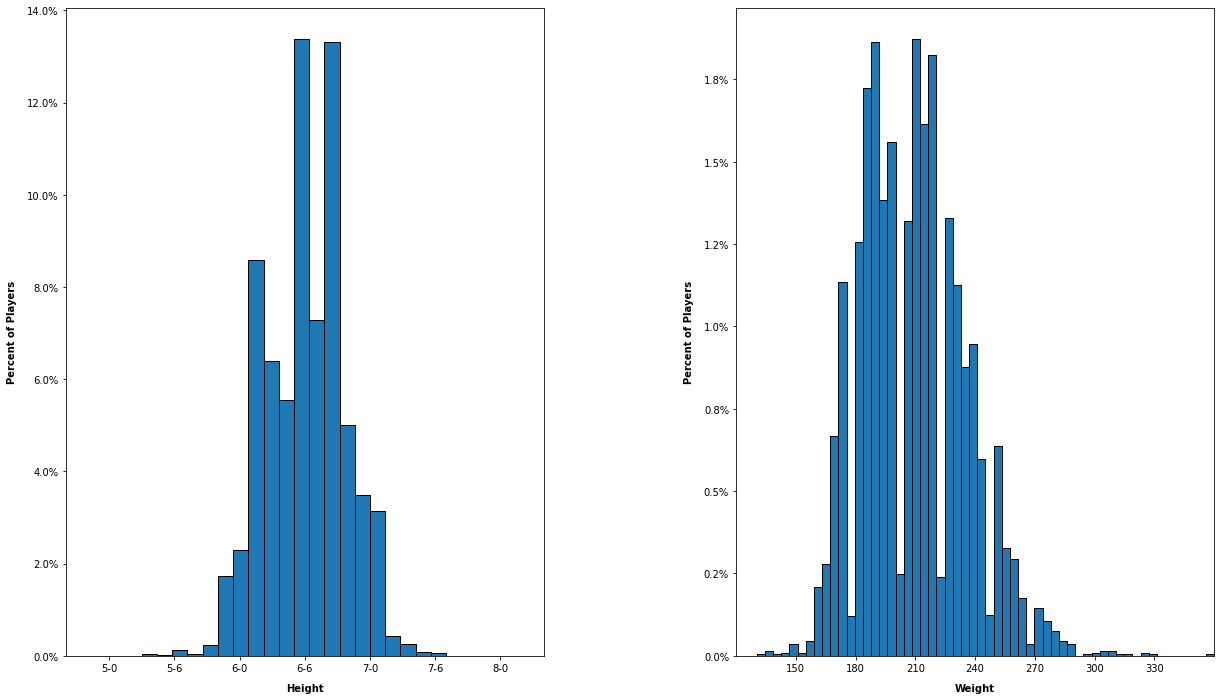

In [7]:
from Regions import stateDict #stateDict is a Dictionary to help with geography-based analyses
def metaPlot():
  
  height_list = players_df_meta['height'].tolist()
  weight_list = players_df_meta['weight'].tolist()
  #rightCount = 0; leftCount = 0; noHandCount = 0

  #Plot Height Distribution (1, Left)
  f, ax = plt.subplots(1,2)
  #Sets default plot size
  plt.rcParams['figure.figsize'] = (10,8)
  n1, bins1, patches1 = ax[0].hist(height_list, bins=20, density=True, histtype='bar', ec='black')
  #Converting y-axis labels from decimals to percents
  y_vals = ax[0].get_yticks(); ax[0].set_yticklabels(['{:3.1f}%'.format(y*100) for y in y_vals])
  #Converting x-axis labels from inches back to feet
  xticks1 = ['5-0', '5-6', '6-0', '6-6', '7-0', '7-6', '8-0']
  ax[0].set_xticks([60, 66, 72, 78, 84, 90, 96])
  ax[0].set_xticklabels(xticks1)
  ax[0].set_xlim([56,100])
  ax[0].set_xlabel('Height', fontweight='bold', labelpad=10)
  ax[0].set_ylabel('Percent of Players', fontweight='bold', labelpad=10)

  #Plot Weight Distribution (1, Middle)
  ax[1].hist(weight_list, bins='auto', density=True, histtype='bar', ec='black')
  y_vals = ax[1].get_yticks()
  ax[1].set_yticklabels(['{:3.1f}%'.format(y*100) for y in y_vals])
  xticks2 = ['150', '180', '210', '240', '270', '300', '330']
  ax[1].set_xticks([150, 180, 210, 240, 270, 300, 330])
  ax[1].set_xticklabels(xticks2)
  ax[1].set_xlim([120,360])
  ax[1].set_xlabel('Weight', fontweight='bold', labelpad=10)
  ax[1].set_ylabel('Percent of Players', fontweight='bold', labelpad=10)
  
  plt.tight_layout(pad=0.05, w_pad=1, h_pad=1.0)
  f.set_size_inches(18.5, 10.5, forward=True)
  plt.show()
        
metaPlot()

odict_keys(['Canada', 'France', 'Serbia', 'Germany', 'Australia', 'Croatia', 'Brazil', 'Spain', 'Argentina', 'Lithuania', 'Bosnia and Herzegovina', 'Nigeria', 'Senegal', 'Slovenia', 'United Kingdom', 'Russia', 'Italy', 'Greece', 'Ukraine', 'Puerto Rico', 'Turkey', 'China', 'Jamaica', 'Dominican Republic', 'Latvia', 'Netherlands', 'Montenegro', 'South Sudan', 'Democratic Republic of the Congo', 'Bahamas', 'Haiti', 'Czech Republic', 'Mexico', 'Switzerland', 'Panama', 'New Zealand', 'Israel', 'Cameroon', 'Japan', 'Sweden', 'Poland', 'Belgium', 'Guadeloupe', 'U.S. Virgin Islands', 'Cuba', 'Egypt', 'Sudan', 'Mali', 'French Guiana', 'Venezuela', 'Gabon', 'Lebanon', 'Macedonia', 'Finland', 'Guyana', 'Guinea', 'Romania', nan, nan, nan, nan, nan, 'Iran', nan, nan, nan, nan, nan, nan, nan, nan, 'Republic of the Congo', nan, nan, nan, 'Cape Verde', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'South Africa', nan, nan, nan, nan, nan, 'Ang

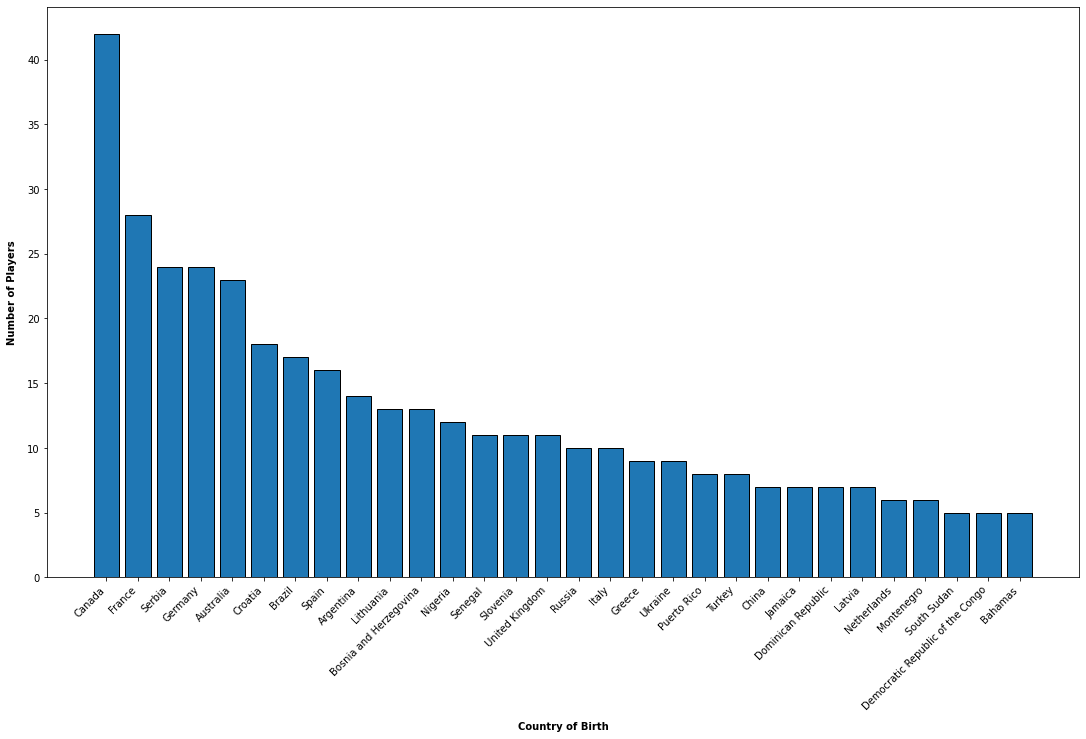

In [8]:
def geographyPlot():
  countryList = players_df_meta['birthCountry'].tolist()
  #countryList contains all players born in ex-US
  countryList = filter(lambda x: x != 'United States of America', countryList)
  countryList = filter(lambda x: x != '', countryList)
  countryHash = dict(Counter(countryList))
  countryHash = OrderedDict(sorted(countryHash.items(), reverse=True, key=lambda t: t[1]))

  pprint(countryHash.keys())

  #Plot Birth Countries of non-US-Born Players (3)
  max_countries = 30
  f, ax = plt.subplots(1)
  countryList = list(countryHash.keys())[:max_countries]
  countryVals = list(countryHash.values())[:max_countries]
  ax.bar(np.arange(len(countryList)), countryVals, ec='black')
  ax.set_xticks(np.arange(len(countryList)))
  ax.set_xticklabels(countryList, rotation=45, ha='right', fontsize=10)
  ax.set_xlabel('Country of Birth', fontweight='bold', labelpad=10)
  ax.set_ylabel('Number of Players', fontweight='bold', labelpad=10)
  
  f.set_size_inches(18.5, 10.5, forward=True)
  plt.show()
    
geographyPlot()

***
## Season Data

Analyses on season-wide stats.

In [9]:
#@title Table Select { run: "auto" }

#@markdown Per Game | Totals | Advanced | Per Minute | Per Possession | Adjusted Shooting | Play-By-Play | Shooting | All-Star | Salaries
table_type = "per_game" #@param ["all", "per_game", "totals", "advanced", "per_minute", "per_poss", "adjooting", "pbp", "shooting", "all_star", "all_salaries"] {allow-input: true}

#@markdown Season or Playoff Stats
season_playoffs = "both" #@param ["both", "season", "playoffs"]

def table_select(df, table_type, season_playoffs):
  df_filtered = df.copy(deep=True)
  if table_type != 'all':
    df_filtered = df[df['data_type'] == table_type]
    df_filtered = df_filtered.dropna(how='all', axis='columns')
  if season_playoffs != 'both':
    df_filtered = df_filtered[df_filtered['season_playoffs'] == season_playoffs]
  return df_filtered

table_selected = table_select(players_df_data, table_type, season_playoffs)

In [17]:
table_selected[table_selected['pts_per_g'] == np.nanmax(table_selected['pts_per_g'])]

,data_type,season_playoffs,player_name,season,age,team_id,lg_id,pos,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,ft_per_g,fta_per_g,ft_pct,trb_per_g,ast_per_g,pf_per_g,pts_per_g,fg3_per_g,fg3a_per_g,fg3_pct,fg2_per_g,fg2a_per_g,fg2_pct,efg_pct,orb_per_g,drb_per_g,stl_per_g,blk_per_g,tov_per_g
2,per_game,season,Wilt Chamberlain,1961-62,25.0,PHW,NBA,C,80.0,NaN,48.5,20.0,39.5,0.506,10.4,17.0,0.613,25.7,2.4,1.5,50.4,NaN,NaN,NaN,20.0,39.5,0.506,0.506,NaN,NaN,NaN,NaN,NaN


In [18]:
table_selected[table_selected['blk_per_g'] == np.nanmax(table_selected['blk_per_g'])]

,data_type,season_playoffs,player_name,season,age,team_id,lg_id,pos,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,ft_per_g,fta_per_g,ft_pct,trb_per_g,ast_per_g,pf_per_g,pts_per_g,fg3_per_g,fg3a_per_g,fg3_pct,fg2_per_g,fg2a_per_g,fg2_pct,efg_pct,orb_per_g,drb_per_g,stl_per_g,blk_per_g,tov_per_g
3,per_game,season,Edy Tavares,2016-17,24.0,CLE,NBA,C,1.0,0.0,24.0,3.0,4.0,0.75,0.0,1.0,0.0,10.0,1.0,3.0,6.0,0.0,0.0,NaN,3.0,4.0,0.75,0.75,4.0,6.0,0.0,6.0,2.0


You can use widgets to filter data, as an example below:

In [ ]:
# WIP

***
## Gamelogs

Analyses on gamelog stats.

In [11]:
players_df_gamelogs

,player_name,season,season_playoffs,rk,g,date,age,tm,loc,opp,win,gs,mp,fg,fga,fg%,ft,fta,ft%,trb,ast,pf,pts,note,3p,3pa,3p%,orb,drb,stl,blk,tov,gmsc,plus_minus
0,Joe Fabel,1946-47,season,1,1.0,1946-11-24,29-193,PIT,@,CLR,L (-2),NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Joe Fabel,1946-47,season,2,2.0,1946-11-25,29-194,PIT,NaN,NYK,L (-16),NaN,NaN,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Joe Fabel,1946-47,season,3,3.0,1946-11-27,29-196,PIT,NaN,CLR,W (+2),NaN,NaN,1.0,NaN,NaN,4.0,6.0,0.667,NaN,NaN,5.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Joe Fabel,1946-47,season,4,4.0,1946-11-28,29-197,PIT,@,BOS,L (-4),NaN,NaN,3.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,4.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Joe Fabel,1946-47,season,5,5.0,1946-11-30,29-199,PIT,@,WSC,L (-9),NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.000,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,Michael Bytzura,1946-47,season,55,55.0,1947-03-18,24-273,PIT,@,TRH,W (+6),NaN,NaN,3.0,NaN,NaN,3.0,6.0,0.500,NaN,NaN,3.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,Michael Bytzura,1946-47,season,56,56.0,1947-03-19,24-274,PIT,NaN,STB,L (-25),NaN,NaN,2.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,Michael Bytzura,1946-47,season,57,57.0,1947-03-22,24-277,PIT,@,DTF,L (-20),NaN,NaN,2.0,NaN,NaN,1.0,1.0,1.000,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,Michael Bytzura,1946-47,season,58,58.0,1947-03-24,24-279,PIT,NaN,NYK,L (-14),NaN,NaN,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
players_df_gamelogs[players_df_gamelogs['pts']==np.nanmax(players_df_gamelogs['pts'])]

,player_name,season,season_playoffs,rk,g,date,age,tm,loc,opp,win,gs,mp,fg,fga,fg%,ft,fta,ft%,trb,ast,pf,pts,note,3p,3pa,3p%,orb,drb,stl,blk,tov,gmsc,plus_minus
75,Wilt Chamberlain,1961-62,season,76,76.0,1962-03-02,25-193,PHW,NaN,NYK,W (+22),NaN,48:00,36.0,63.0,0.571,28.0,32.0,0.875,25.0,2.0,2.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
players_df_gamelogs[players_df_gamelogs['player_name']=='Wilt Chamberlain']

,player_name,season,season_playoffs,rk,g,date,age,tm,loc,opp,win,gs,mp,fg,fga,fg%,ft,fta,ft%,trb,ast,pf,pts,note,3p,3pa,3p%,orb,drb,stl,blk,tov,gmsc,plus_minus
0,Wilt Chamberlain,1959-60,season,1,1.0,1959-10-24,23-064,PHW,@,NYK,W (+9),NaN,48:00,17.0,27.0,0.630,9.0,15.0,0.600,28.0,1.0,4.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wilt Chamberlain,1959-60,season,2,2.0,1959-10-31,23-071,PHW,NaN,DET,W (+8),NaN,47:00,13.0,32.0,0.406,10.0,15.0,0.667,34.0,2.0,0.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Wilt Chamberlain,1959-60,season,3,3.0,1959-11-04,23-075,PHW,NaN,SYR,W (+11),NaN,47:00,17.0,40.0,0.425,7.0,15.0,0.467,40.0,0.0,1.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wilt Chamberlain,1959-60,season,4,4.0,1959-11-07,23-078,PHW,@,BOS,L (-9),NaN,48:00,12.0,38.0,0.316,6.0,12.0,0.500,28.0,1.0,2.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wilt Chamberlain,1959-60,season,5,5.0,1959-11-08,23-079,PHW,NaN,CIN,W (+28),NaN,39:00,12.0,32.0,0.375,8.0,14.0,0.571,35.0,2.0,0.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Wilt Chamberlain,1972-73,playoffs,13,13.0,1973-05-01,36-253,LAL,NaN,NYK,W (+3),1.0,48:00,5.0,11.0,0.455,2.0,4.0,0.500,20.0,6.0,3.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,Wilt Chamberlain,1972-73,playoffs,14,14.0,1973-05-03,36-255,LAL,NaN,NYK,L (-4),1.0,48:00,2.0,4.0,0.500,1.0,9.0,0.111,20.0,0.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Wilt Chamberlain,1972-73,playoffs,15,15.0,1973-05-06,36-258,LAL,@,NYK,L (-4),1.0,48:00,2.0,3.0,0.667,1.0,4.0,0.250,13.0,5.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Wilt Chamberlain,1972-73,playoffs,16,16.0,1973-05-08,36-260,LAL,@,NYK,L (-5),1.0,48:00,4.0,8.0,0.500,5.0,7.0,0.714,19.0,5.0,3.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
